# ImageDataGenerator.flow_from_directory 이용하여 이미지 읽고 모델만들기

https://keras.io/preprocessing/image/

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
from glob import glob

In [3]:
os.listdir('./mnist_png/mnist_png/training')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
train_dir = './mnist_png/mnist_png/training'
test_dir = './mnist_png/mnist_png/testing'

## Hyperparameter Tunning

In [5]:
num_epochs = 3
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (28, 28, 1)
num_classes = 10

## Preprocess : 1개 이미지 읽어 변형해 보기

In [6]:
# 이미지 변경 템플릿 만듬
train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.3,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# 이미지 한개 선택
image1 = './mnist_png/mnist_png/training/0/1.png'

In [8]:
from glob import glob
os.listdir('./mnist_png/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
# 이미지 읽어오기
gfile = tf.io.read_file(image1)
image = tf.io.decode_image(gfile)
image.shape

TensorShape([28, 28, 1])

In [10]:
# ImageDataGenerator에 넣기 위해 4차원으로 이미지 포맷변경
image = image[tf.newaxis, ...]
image.shape

TensorShape([1, 28, 28, 1])

In [11]:
# 이미지 한개 주어 이미지 변형시키고 1개 축출
transform_image = next(iter(train_datagen.flow(image)))
transform_image.shape

(1, 28, 28, 1)

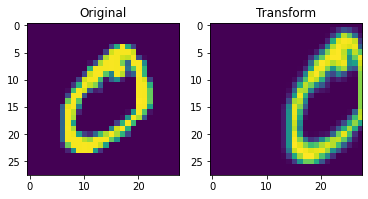

In [12]:
plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(image))
plt.subplot(122)
plt.title('Transform')
plt.imshow(np.squeeze(transform_image))
plt.show()

## Preprocess : 폴더 밑에 이미지를 읽어 변형하기

In [13]:
# './mnist_png/mnist_png/training' 폴더 밑에 class 값에 해당되는 폴더 리스트가 있고 
# class 값 폴더 안에 해당하는 이미지 파일 있어야 함.
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=input_shape[:2],
        batch_size=batch_size,
        color_mode='grayscale'
)

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=input_shape[:2],
        batch_size=batch_size,
        color_mode='grayscale'
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


## Preprocess : 변형된 이미지를 batch size 만큼 읽어 보여주기

In [14]:
images, labels = next(iter(train_generator))
images.shape, labels.shape

((32, 28, 28, 1), (32, 10))

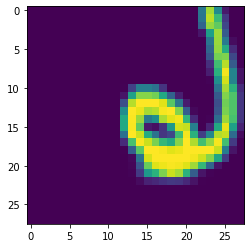

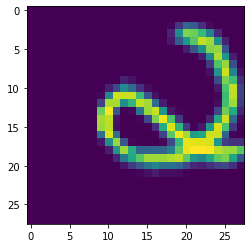

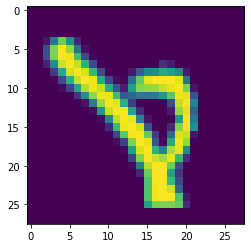

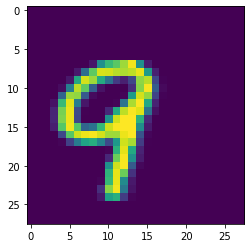

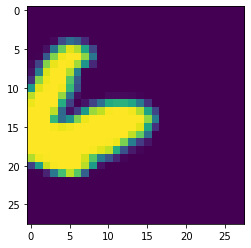

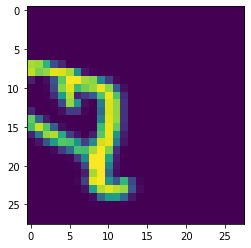

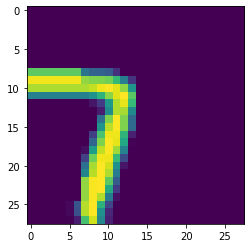

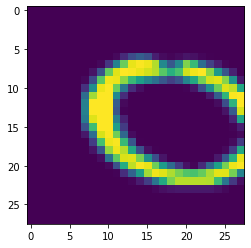

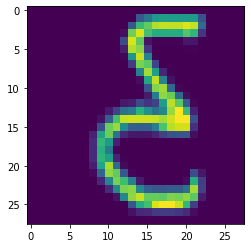

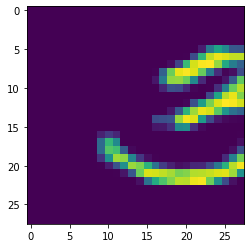

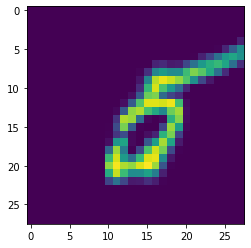

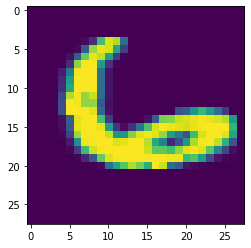

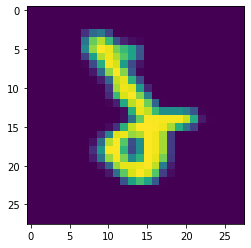

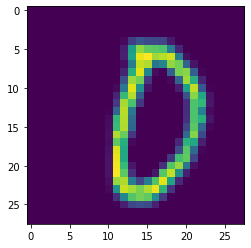

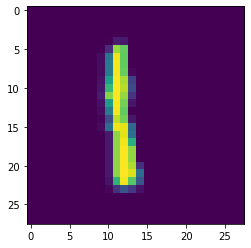

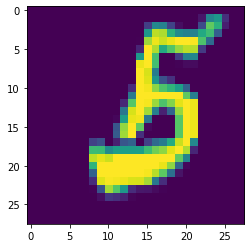

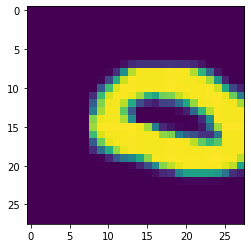

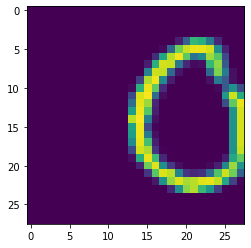

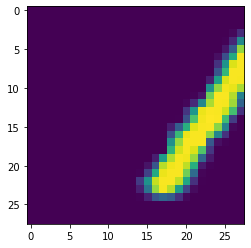

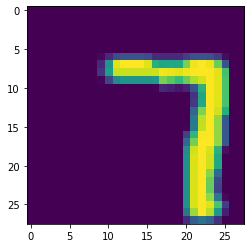

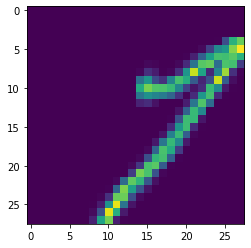

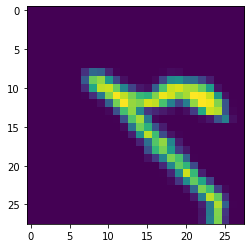

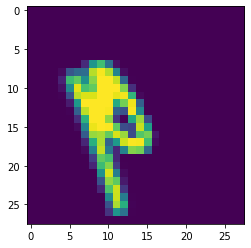

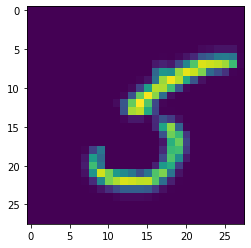

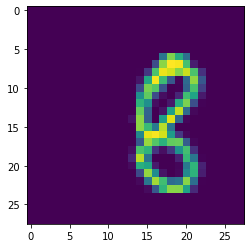

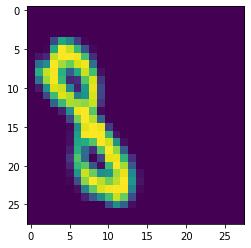

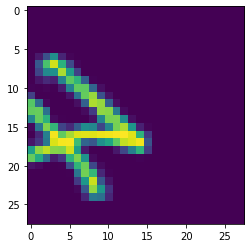

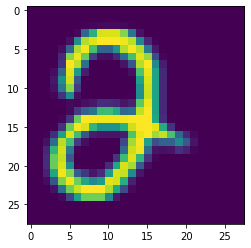

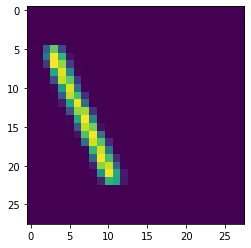

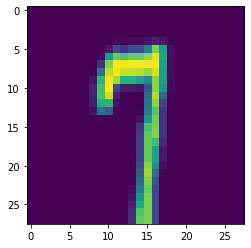

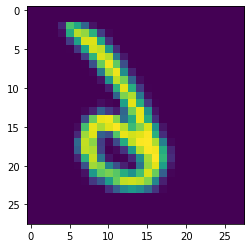

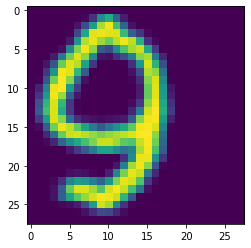

In [15]:
for i in range(images.shape[0]):
    plt.imshow(images[i])
    plt.show()

## Build Model

In [16]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [17]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

## Training

In [18]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=num_epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
1875/1875 [==============================] - 222s 118ms/step - loss: 0.5533 - accuracy: 0.8150 - val_loss: 0.0997 - val_accuracy: 0.9669
Epoch 2/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.2228 - accuracy: 0.9304 - val_loss: 0.0646 - val_accuracy: 0.9795
Epoch 3/3
1875/1875 [==============================] - 170s 91ms/step - loss: 0.1745 - accuracy: 0.9457 - val_loss: 0.0560 - val_accuracy: 0.9820


In [19]:
history.history

{'loss': [0.5532729625701904, 0.2227729707956314, 0.17445766925811768],
 'accuracy': [0.8149833083152771, 0.930400013923645, 0.9457333087921143],
 'val_loss': [0.09966612607240677, 0.06459509581327438, 0.05597827211022377],
 'val_accuracy': [0.9668999910354614, 0.9794999957084656, 0.9819999933242798]}

In [20]:
history.params

{'verbose': 1, 'epochs': 3, 'steps': 1875}